# 1. Data Cleaning ✅

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv('/content/tweet.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,sentimen,tweet
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp"
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


In [ ]:
! pip install nltk

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  1815 non-null   object
 1   tweet     1815 non-null   object
dtypes: object(2)
memory usage: 28.5+ KB


In [ ]:
# Convert 'tweet' column to string
df['tweet'] = df['tweet'].astype(str)

# Convert 'sentimen' column to categorical type
df['sentimen'] = df['sentimen'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sentimen  1815 non-null   category
 1   tweet     1815 non-null   object  
dtypes: category(1), object(1)
memory usage: 16.2+ KB


In [ ]:
from nltk.corpus import stopwords
import nltk

# Download the stopwords list if not already downloaded
nltk.download('stopwords')

# Get Indonesian stopwords
stop_words = set(stopwords.words('indonesian')) # Use words instead of get

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re

def clean_text(text):
    # Remove URL + lowercase
    text = re.sub(r'#(\w+)', lambda match: ' ' + re.sub(r'(?<=[a-z0-9])(?=[A-Z])', ' ', match.group(1)), text)
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'www\.\S+', '', text)
    text = re.sub(r'pic\.twitter\.com/\S+', '', text)

    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply cleaning function to the 'tweet' column
df['tweet_clean'] = df['tweet'].apply(clean_text)


In [ ]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",kata prabowo indonesia tidak dihargai bangsa asing berita ini pasti hoax buatan penguasa ya kan rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batuan langka tasbih jokowi hadiah dari habib luthfi seharga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",di era jokowi ekonomi indonesia semakin baik 01 indonesia maju jokowi lagi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",bagi sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakatnya ngeluh karena negara ngutang setiap negara itu pasti ngutang utang bisa dibayar kalo negara dapet penghasilan penghasilan negara itu ya dari pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah di damai indonesiaku 2 perekonomian makin membaik putihkan gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn mendukung perekonomian negara bersama pak jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu majukan perekonomian bangsa bersama pak jokowi yuk


# 2. Text Normalization ✅

## 2.1 Lemmatization : nlp_id ✅

In [ ]:
! pip install nlp-id

In [ ]:
from nlp_id.lemmatizer import Lemmatizer

def lemmetize_indonesian(text):
    # Create an instance of the stemmer
    lemmatizer = Lemmatizer()
    tokens = text.split()
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Combine lemmatized tokens back into a single string (if needed)
    lemmatized_text = ' '.join(lemmatized_tokens)
    # Print the original and lemmatized tokens and text
    print("Original Tokens:", tokens)
    print("Lemmatized Tokens:", lemmatized_tokens)
    print("Lemmatized Text:", lemmatized_text)
    return lemmatized_text

df["tweet_clean"] = df['tweet_clean'].apply(lemmetize_indonesian)

Streaming output truncated to the last 5000 lines.
Lemmatized Tokens: ['yang', 'penting', 'itu', 'prabowo', 'dan', 'sandi', 'komitmen', 'untuk', 'turun', 'harga', 'listrik', '900', 'w', 'udah', 'gitu', 'aja', 'kok', 'kalian', 'dukung', 'si', 'jae', 'yang', 'ga', 'tuju', 'kami', 'dukung', 'prabowo', 'sandi', 'tuju', 'aja', 'kok', 'dan', 'moga', 'pak', 'prabowo', 'adalah', 'pimpin', 'yang', 'tepat', 'janji', 'kampanye', 'ga', 'kayak', 'si', 'jae']
Lemmatized Text: yang penting itu prabowo dan sandi komitmen untuk turun harga listrik 900 w udah gitu aja kok kalian dukung si jae yang ga tuju kami dukung prabowo sandi tuju aja kok dan moga pak prabowo adalah pimpin yang tepat janji kampanye ga kayak si jae
Original Tokens: ['menurut', 'jokowi', 'warga', 'di', 'papua', 'juga', 'berhak', 'merasakan', 'harga', 'bbm', 'yang', 'sama', 'seperti', 'di', 'pulau', 'jawa', 'jkw', 'amin', 'hamterjamin', '01ndonesia', 'maju']
Lemmatized Tokens: ['turut', 'jokowi', 'warga', 'di', 'papua', 'juga', 'hak',

In [ ]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",kata prabowo indonesia tidak harga bangsa asing berita ini pasti hoax buat kuasa ya kan rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah dari habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",di era jokowi ekonomi indonesia makin baik 01 indonesia maju jokowi lagi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",bagi sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakat ngeluh karena negara ngutang tiap negara itu pasti ngutang utang bisa bayar kalo negara dapet hasil hasil negara itu ya dari pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga dan depan harga diri bangsa yg daulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah di damai indonesia 2 ekonomi makin baik putih gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn dukung ekonomi negara sama pak jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu maju ekonomi bangsa sama pak jokowi yuk


In [ ]:
# Write csv
file_path = 'text_lemmatize_1(Kevin).csv'
df.to_csv(file_path, index=False)

## 2.1.b Stemming : Sastrawi ✅

In [ ]:
! pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

def lemmatization_indonesian(text):
    # Create a stemmer for Indonesian
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    tokens = text.split()

    # Lemmatization for Indonesian
    lemmatized_tokens = [stemmer.stem(token) for token in tokens]
    # Combine lemmatized tokens back into a single string (if needed)
    lemmatized_text = ' '.join(lemmatized_tokens)
    # Print the original and lemmatized tokens and text
    print("Original Tokens:", tokens)
    print("Lemmatized Tokens:", lemmatized_tokens)
    print("Lemmatized Text:", lemmatized_text)
    return lemmatized_text

df["tweet_clean"] = df['tweet_clean'].apply(lemmatization_indonesian)


Streaming output truncated to the last 5000 lines.
Lemmatized Tokens: ['yang', 'penting', 'itu', 'prabowo', 'dan', 'sandi', 'komitmen', 'untuk', 'turun', 'harga', 'listrik', '900', 'w', 'udah', 'gitu', 'aja', 'kok', 'kalian', 'dukung', 'si', 'jae', 'yang', 'ga', 'tuju', 'kami', 'dukung', 'prabowo', 'sandi', 'tuju', 'aja', 'kok', 'dan', 'moga', 'pak', 'prabowo', 'adalah', 'pimpin', 'yang', 'tepat', 'janji', 'kampanye', 'ga', 'kayak', 'si', 'jae']
Lemmatized Text: yang penting itu prabowo dan sandi komitmen untuk turun harga listrik 900 w udah gitu aja kok kalian dukung si jae yang ga tuju kami dukung prabowo sandi tuju aja kok dan moga pak prabowo adalah pimpin yang tepat janji kampanye ga kayak si jae
Original Tokens: ['turut', 'jokowi', 'warga', 'di', 'papua', 'juga', 'hak', 'rasa', 'harga', 'bbm', 'yang', 'sama', 'seperti', 'di', 'pulau', 'jawa', 'jkw', 'amin', 'hamterjamin', '01ndonesia', 'maju']
Lemmatized Tokens: ['turut', 'jokowi', 'warga', 'di', 'papua', 'juga', 'hak', 'rasa', '

In [ ]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",kata prabowo indonesia tidak harga bangsa asing berita ini pasti hoax buat kuasa ya kan rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah dari habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",di era jokowi ekonomi indonesia makin baik 01 indonesia maju jokowi lagi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",bagi sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakat ngeluh karena negara ngutang tiap negara itu pasti ngutang utang bisa bayar kalo negara dapet hasil hasil negara itu ya dari pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga dan depan harga diri bangsa yg daulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah di damai indonesia 2 ekonomi makin baik putih gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn dukung ekonomi negara sama pak jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu maju ekonomi bangsa sama pak jokowi yuk


In [ ]:
# Write csv
file_path = 'text_lemmatize_2_sastrawi (KEVIN).csv'
df.to_csv(file_path, index=False)

# 3. Text Modeling With Lemmitize With Random Forest ✅

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv('/content/text_lemmatize_1(Kevin) (1).csv')
df.head()

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",kata prabowo indonesia tidak harga bangsa asing berita ini pasti hoax buat kuasa ya kan rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah dari habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",di era jokowi ekonomi indonesia makin baik 01 indonesia maju jokowi lagi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",bagi sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakat ngeluh karena negara ngutang tiap negara itu pasti ngutang utang bisa bayar kalo negara dapet hasil hasil negara itu ya dari pajak


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentimen     1815 non-null   object
 1   tweet        1815 non-null   object
 2   tweet_clean  1815 non-null   object
dtypes: object(3)
memory usage: 42.7+ KB


In [ ]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",kata prabowo indonesia tidak harga bangsa asing berita ini pasti hoax buat kuasa ya kan rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah dari habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",di era jokowi ekonomi indonesia makin baik 01 indonesia maju jokowi lagi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",bagi sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakat ngeluh karena negara ngutang tiap negara itu pasti ngutang utang bisa bayar kalo negara dapet hasil hasil negara itu ya dari pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga dan depan harga diri bangsa yg daulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah di damai indonesia 2 ekonomi makin baik putih gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn dukung ekonomi negara sama pak jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu maju ekonomi bangsa sama pak jokowi yuk


In [ ]:
# Assuming you have already lemmatized your text
lemmatized_texts = df['tweet_clean']
sentiment_labels = df['sentimen']

# Convert sentiment labels to numeric format
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
numeric_labels = [label_mapping[label] for label in sentiment_labels]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize CountVectorizer
cv_vectorizer = CountVectorizer()

# Fit and transform the lemmatized text
X = cv_vectorizer.fit_transform(lemmatized_texts)

# Convert to array if you want to see the result in array format
vectorized_array = X.toarray()

# Get feature names (vocabulary terms)
feature_names = cv_vectorizer.get_feature_names_out()

# Display the vectorized text and feature names
print("Feature Names:", feature_names)
print("Vectorized Array:\n", vectorized_array)

Feature Names: ['000' '01' '01ndonesia' ... 'zippo' 'zon' 'zonk']
Vectorized Array:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
cv_vectorizer.vocabulary_

{'kata': 2316,
 'prabowo': 4038,
 'indonesia': 1946,
 'tidak': 5093,
 'harga': 1775,
 'bangsa': 514,
 'asing': 410,
 'berita': 649,
 'ini': 1979,
 'pasti': 3790,
 'hoax': 1851,
 'buat': 835,
 'kuasa': 2635,
 'ya': 5491,
 'kan': 2272,
 'rockygerung': 4301,
 'batu': 559,
 'langka': 2710,
 'tasbih': 4965,
 'jokowi': 2178,
 'hadiah': 1739,
 'dari': 1073,
 'habib': 1729,
 'luthfi': 2851,
 'mercy': 3126,
 'di': 1152,
 'era': 1426,
 'ekonomi': 1377,
 'makin': 2902,
 'baik': 483,
 '01': 1,
 'maju': 2886,
 'lagi': 2682,
 'menang': 3081,
 'total': 5161,
 'debat': 1092,
 'bagi': 469,
 'sumatera': 4840,
 'selatan': 4534,
 'asi': 407,
 'games': 1567,
 'dampak': 1062,
 'pd': 3806,
 'langsung': 2712,
 'prediksi': 4059,
 'capai': 904,
 '18': 31,
 'triliun': 5190,
 'hebat': 1799,
 'negara': 3384,
 'kita': 2489,
 'ngutang': 3507,
 'bngun': 760,
 'infrastruktur': 1968,
 'yang': 5510,
 'udah': 5286,
 'dipake': 1216,
 'masyarakat': 3013,
 'terus': 5059,
 'ngeluh': 3456,
 'karena': 2291,
 'tiap': 5089,
 'it

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import gensim.downloader as gensim_api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import transformers
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ---------------------------- RANDOM FOREST ----------------------------

# 1. Split the data into training and testing sets
X = vectorized_array
y = numeric_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [200],          # Number of trees
    'max_depth': [20],         # Maximum depth of the tree
    'min_samples_split': [5],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1],           # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt'],        # The number of features to consider when looking for the best split
    'bootstrap': [False]               # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with Random Forest and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best Random Forest model after tuning
best_rf_model = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Random Forest Score:", grid_search.best_score_)

X_train shape: (1452, 5556)
X_test shape: (363, 5556)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Score: 0.5867768595041323


Accuracy: 0.6253443526170799
Classification Report:
               precision    recall  f1-score   support

    negative       0.63      0.70      0.66       115
     neutral       0.61      0.68      0.64       118
    positive       0.64      0.52      0.57       130

    accuracy                           0.63       363
   macro avg       0.63      0.63      0.62       363
weighted avg       0.63      0.63      0.62       363

Confusion Matrix:
 [[80 20 15]
 [16 80 22]
 [31 32 67]]


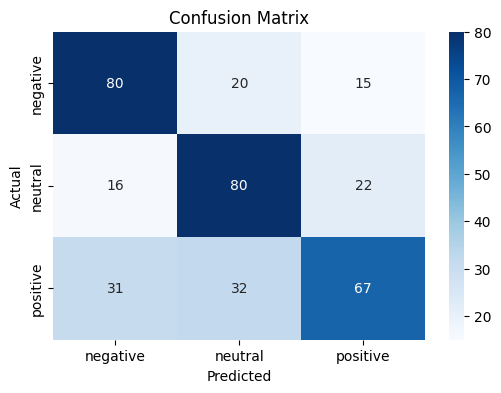

In [ ]:
# Evaluate the tuned Random Forest on the test data
y_pred = best_rf_model.predict(X_test)

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()